# Αξιοποίηση του ΑΡΙ της ΔΙΑΥΓΕΙΑΣ από τα

- ΔΗΜΟΚΡΙΤΕΙΟ ΠΑΝΕΠΙΣΤΗΜΙΟ ΘΡΑΚΗΣ   
- ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ   
- ΕΘΝΙΚΟ & ΚΑΠΟΔΙΤΡΙΑΚΟ ΠΑΝΕΠΙΣΤΗΜΙΟ

In [ ]:
# Αρχικοποίηση προγράμματος
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt # Προσθήκη για γραφήματα
import matplotlib.ticker as ticker # Για καλύτερη μορφοποίηση των αξόνων
import pandas as pd # Χρήσιμο για τη συγκριτική παρουσίαση

# Δημιουργία λίστας με τα πανεπιστήμια
institutions = [
    {"name": "ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ", "uid": "99206919", "short_name": "ΠΑΜΑΚ"},
    {"name": "ΕΘΝΙΚΟ & ΚΑΠΟΔΙΣΤΡΙΑΚΟ ΠΑΝΕΠΙΣΤΗΜΙΟ ΑΘΗΝΩΝ", "uid": "99203020", "short_name": "ΕΚΠΑ"},
    {"name": "ΔΗΜΟΚΡΙΤΕΙΟ ΠΑΝΕΠΙΣΤΗΜΙΟ ΘΡΑΚΗΣ", "uid": "99202868", "short_name": "ΔΠΘ"}
]

# Βασική διεύθυνση για αναζητήσεις
base_url_search = "https://diavgeia.gov.gr/opendata/search.json"

# Χρόνικό όριο αναζήτησης
years_range = range(2019, 2025)

## Ερώτημα 1

### Ανάκτηση στοιχείων του ιδρύματος

In [14]:
# Ερώτημα 1

def get_institution_details(uid):
    url = f"https://diavgeia.gov.gr/opendata/organizations/{uid}.xml"
    try:
        response = requests.get(url, timeout=10) # Προσθήκη timeout
        response.raise_for_status() # Έλεγχος για HTTP errors
        xml_data = response.content
        namespace = {'ns': 'http://diavgeia.gov.gr/schema/v2'}
        root = ET.fromstring(xml_data)

        details = {
            "label": root.find('ns:label', namespace).text if root.find('ns:label', namespace) is not None else "N/A",
            "latin_name": root.find('ns:latinName', namespace).text if root.find('ns:latinName', namespace) is not None else "N/A",
            "status": root.find('ns:status', namespace).text if root.find('ns:status', namespace) is not None else "N/A",
            "category": root.find('ns:category', namespace).text if root.find('ns:category', namespace) is not None else "N/A",
            "vat_number": root.find('ns:vatNumber', namespace).text if root.find('ns:vatNumber', namespace) is not None else "N/A",
            "website": root.find('ns:website', namespace).text if root.find('ns:website', namespace) is not None else "N/A",
            "supervisor_label": root.find('ns:supervisorLabel', namespace).text if root.find('ns:supervisorLabel', namespace) is not None else "N/A"
        }
        return details
    except requests.exceptions.RequestException as e:
        print(f"Σφάλμα κατά την ανάκτηση στοιχείων για UID {uid}: {e}")
        return None
    except ET.ParseError as e:
        print(f"Σφάλμα parsing XML για UID {uid}: {e}")
        return None
    
    print("## Ερώτημα 1: Ανάκτηση Στοιχείων Ιδρυμάτων ##\n")
all_institution_details = [] # Λίστα για αποθήκευση όλων των λεπτομερειών

for inst in institutions:
    print(f"--- Στοιχεία για: {inst['name']} (UID: {inst['uid']}) ---")
    details = get_institution_details(inst['uid'])
    if details:
        all_institution_details.append({'institution': inst['short_name'], **details}) # Αποθήκευση για μελλοντική χρήση (π.χ. DataFrame)
        print(f"  Ονομασία: {details['label']}")
        print(f"  Λατινικό Όνομα: {details['latin_name']}")
        print(f"  Κατάσταση: {details['status']}")
        print(f"  Κατηγορία: {details['category']}")
        print(f"  ΑΦΜ: {details['vat_number']}")
        print(f"  Ιστοσελίδα: {details['website']}")
        print(f"  Εποπτεύουσα Αρχή: {details['supervisor_label']}\n")
    else:
        print("  Δεν ήταν δυνατή η ανάκτηση των στοιχείων.\n")



--- Στοιχεία για: ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (UID: 99206919) ---
  Ονομασία: ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ
  Λατινικό Όνομα: pamak
  Κατάσταση: active
  Κατηγορία: UNIVERSITY
  ΑΦΜ: 090020486
  Ιστοσελίδα: http://www.uom.gr
  Εποπτεύουσα Αρχή: ΥΠΟΥΡΓΕΙΟ ΠΑΙΔΕΙΑΣ, ΘΡΗΣΚΕΥΜΑΤΩΝ ΚΑΙ ΑΘΛΗΤΙΣΜΟΥ

--- Στοιχεία για: ΕΘΝΙΚΟ & ΚΑΠΟΔΙΣΤΡΙΑΚΟ ΠΑΝΕΠΙΣΤΗΜΙΟ ΑΘΗΝΩΝ (UID: 99203020) ---
  Ονομασία: ΕΘΝΙΚΟ & ΚΑΠΟΔΙΣΤΡΙΑΚΟ ΠΑΝΕΠΙΣΤΗΜΙΟ ΑΘΗΝΩΝ
  Λατινικό Όνομα: uoa
  Κατάσταση: active
  Κατηγορία: UNIVERSITY
  ΑΦΜ: 090010689
  Ιστοσελίδα: http://www.uoa.gr
  Εποπτεύουσα Αρχή: ΥΠΟΥΡΓΕΙΟ ΠΑΙΔΕΙΑΣ, ΘΡΗΣΚΕΥΜΑΤΩΝ ΚΑΙ ΑΘΛΗΤΙΣΜΟΥ

--- Στοιχεία για: ΔΗΜΟΚΡΙΤΕΙΟ ΠΑΝΕΠΙΣΤΗΜΙΟ ΘΡΑΚΗΣ (UID: 99202868) ---
  Ονομασία: ΔΗΜΟΚΡΙΤΕΙΟ ΠΑΝΕΠΙΣΤΗΜΙΟ ΘΡΑΚΗΣ
  Λατινικό Όνομα: duth
  Κατάσταση: active
  Κατηγορία: UNIVERSITY
  ΑΦΜ: 090028889
  Ιστοσελίδα: http://www.duth.gr
  Εποπτεύουσα Αρχή: ΥΠΟΥΡΓΕΙΟ ΠΑΙΔΕΙΑΣ, ΘΡΗΣΚΕΥΜΑΤΩΝ ΚΑΙ ΑΘΛΗΤΙΣΜΟΥ



## Ερώτημα 2

### Αναρτήσεις πράξεων έχει προχωρήσει κάθε Ίδρυμα με ημερομηνία έκδοσης (issue date) κατά τα έτη 2019-2024

🔍 [Ερώτημα 2] Αναζήτηση συνολικών πράξεων για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (UID: 99206919)...

  🔄 Επεξεργασία έτους: 2019 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2019 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ. Σύνολο: 16365

  🔄 Επεξεργασία έτους: 2020 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2020 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ. Σύνολο: 13591

  🔄 Επεξεργασία έτους: 2021 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2021 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ. Σύνολο: 14952

  🔄 Επεξεργασία έτους: 2022 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2022 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ. Σύνολο: 13790

  🔄 Επεξεργασία έτους: 2023 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2023 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ. Σύνολο: 15025

  🔄 Επεξεργασία έτους: 2024 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2024 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ. Σύνολο: 13653

🔍 [Ερώτημα 2] Αν

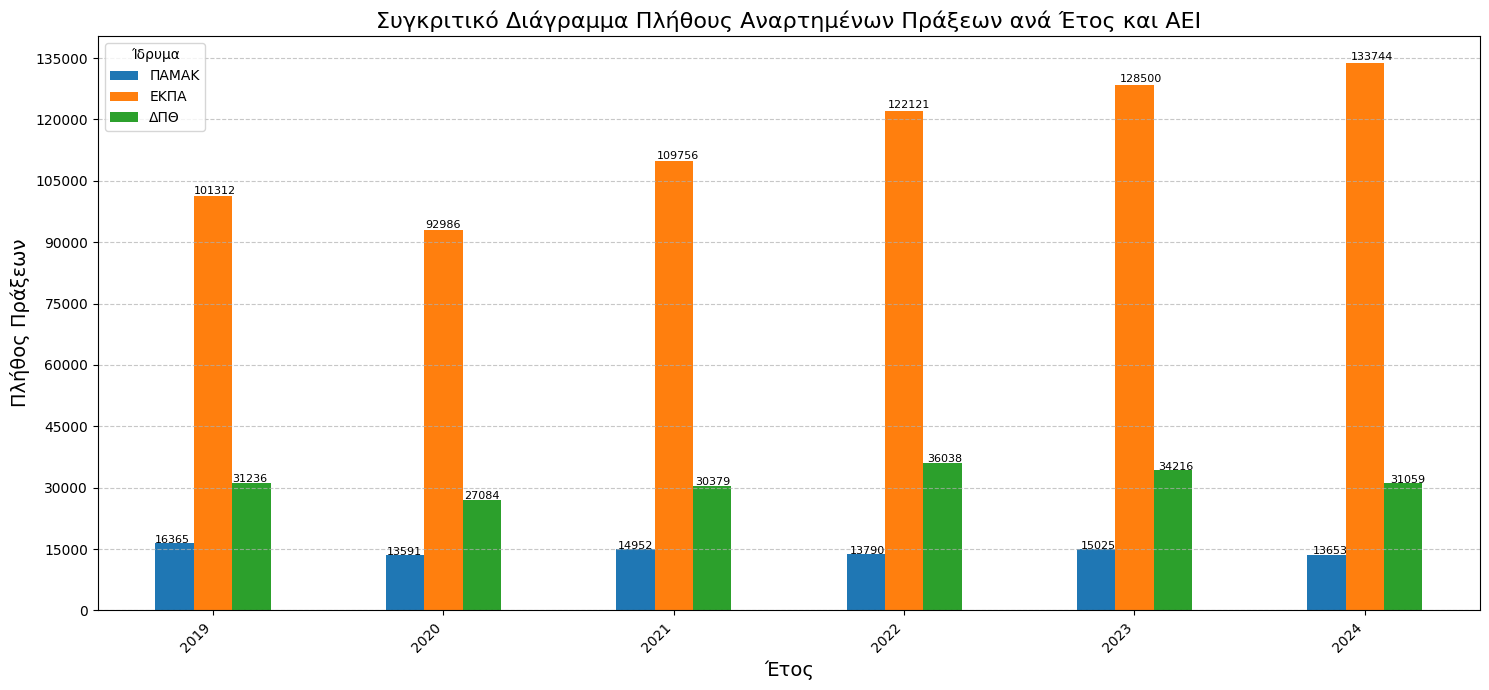

In [16]:
# Ερώτημα 2
def get_yearly_counts(uid, institution_name, years_range_param):
    yearly_results = {}
    print(f"🔍 Αναζήτηση συνολικών πράξεων για {institution_name} (UID: {uid})...\n")

    for year_val in years_range_param:
        print(f"  🔄 Επεξεργασία έτους: {year_val} για {institution_name}...")
        yearly_total_for_this_year = 0
        error_occurred_this_year = False

        date_periods = [
            (f"{year_val}-01-01", f"{year_val}-04-30"),
            (f"{year_val}-05-01", f"{year_val}-08-31"),
            (f"{year_val}-09-01", f"{year_val}-12-31")
        ]

        for period_idx, (from_date, to_date) in enumerate(date_periods):
            params = {
                "org": uid,
                "from_issue_date": from_date,
                "to_issue_date": to_date,
                "size": 1
            }
            try:
                response = requests.get(base_url_search, params=params, timeout=60) # Αύξηση timeout
                response.raise_for_status()
                data = response.json()
                sub_total = data.get("info", {}).get("total", 0)
                yearly_total_for_this_year += sub_total
            except requests.exceptions.HTTPError as http_err:
                print(f"    ⚠️  Σφάλμα HTTP (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name}. Σφάλμα: {http_err}")
                error_occurred_this_year = True
                break
            except requests.exceptions.RequestException as req_err:
                print(f"    ⚠️  Σφάλμα αιτήματος (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name}. Σφάλμα: {req_err}")
                error_occurred_this_year = True
                break
            except ValueError as json_err: 
                print(f"    ⚠️  Σφάλμα JSON (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name}. Σφάλμα: {json_err} (Απάντηση: {response.text[:100]})")
                error_occurred_this_year = True
                break
            except Exception as e:
                print(f"    ⚠️  Άγνωστο σφάλμα (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name}. Σφάλμα: {e}")
                error_occurred_this_year = True
                break
        
        if error_occurred_this_year:
            yearly_results[year_val] = "Σφάλμα"
            print(f"  ❌ Ολοκληρώθηκε με σφάλματα η επεξεργασία του έτους {year_val} για {institution_name}.\n")
        else:
            yearly_results[year_val] = yearly_total_for_this_year
            print(f"  ✅ Ολοκληρώθηκε η επεξεργασία του έτους {year_val} για {institution_name}. Σύνολο: {yearly_total_for_this_year}\n")
            
    return yearly_results

# --- Συλλογή δεδομένων για όλα τα ιδρύματα ---
all_results_q2 = {}
for inst in institutions:
    all_results_q2[inst['short_name']] = get_yearly_counts(inst['uid'], inst['name'], years_range)

# --- Δημιουργία DataFrame για συγκριτική παρουσίαση ---
# Μετατροπή του λεξικού των αποτελεσμάτων σε κατάλληλη μορφή για DataFrame
# (κάθε γραμμή ένα έτος, κάθε στήλη ένα ίδρυμα)
df_q2_yearly_counts = pd.DataFrame(all_results_q2)

print("\n" + "="*60)
print("📊 [Ερώτημα 2] Συγκριτικός Πίνακας Πλήθους Πράξεων ανά Έτος και Ίδρυμα")
print("="*60)
if not df_q2_yearly_counts.empty:
    # Χειρισμός πιθανών τιμών "Σφάλμα" - αντικατάσταση με NaN για αριθμητικές στήλες
    for col in df_q2_yearly_counts.columns:
        df_q2_yearly_counts[col] = pd.to_numeric(df_q2_yearly_counts[col], errors='coerce')
    print(df_q2_yearly_counts.to_string()) # to_string() για καλύτερη εκτύπωση
else:
    print("Δεν υπάρχουν δεδομένα για εμφάνιση στον πίνακα.")
print("="*60 + "\n")


# --- Δημιουργία Συγκριτικού Ραβδογράμματος ---
if not df_q2_yearly_counts.empty:
    # Φιλτράρισμα NaN τιμών για το γράφημα
    df_plot_q2 = df_q2_yearly_counts.fillna(0) # Αντικατάσταση NaN με 0 για το γράφημα, ή αφαίρεση

    if not df_plot_q2.empty:
        df_plot_q2.plot(kind='bar', figsize=(15, 7))
        plt.title('Συγκριτικό Διάγραμμα Πλήθους Αναρτημένων Πράξεων ανά Έτος και ΑΕΙ', fontsize=16)
        plt.xlabel('Έτος', fontsize=14)
        plt.ylabel('Πλήθος Πράξεων', fontsize=14)
        plt.xticks(rotation=45, ha="right")
        plt.yticks(fontsize=10)
        plt.legend(title='Ίδρυμα')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Εξασφάλιση ότι οι τιμές στον άξονα Υ είναι ακέραιοι
        ax = plt.gca()
        ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

        # Προσθήκη τιμών πάνω από τις μπάρες (προαιρετικά, μπορεί να γίνει cluttered)
        for p in ax.patches:
             if p.get_height() > 0: # Εμφάνιση μόνο αν η τιμή είναι > 0
                 ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)

        plt.tight_layout()
        graph_filename_q2_compare = "praxeis_synolikes_q2_ συγκριτικό.png"
        plt.savefig(graph_filename_q2_compare)
        print(f"\n📈 Το συγκριτικό γράφημα (Ερώτημα 2) αποθηκεύτηκε ως '{graph_filename_q2_compare}'")
        plt.show() # Εμφάνιση του γραφήματος
    else:
        print("\n🚫 Δεν υπάρχουν επαρκή δεδομένα (χωρίς σφάλματα) για τη δημιουργία συγκριτικού γραφήματος (Ερώτημα 2).")

else:
    print("\n🚫 Δεν ήταν δυνατή η ανάκτηση δεδομένων για το Ερώτημα 2 για κανένα ίδρυμα.")

## Ερώτημα 3

### Πόσες από τις πράξεις αυτές έχουν ανακληθεί (ανά έτος);

🔍 Αναζήτηση ΑΝΑΚΛΗΜΕΝΩΝ πράξεων για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (UID: 99206919)...

  🔄 Επεξεργασία έτους: 2019 για ανακλημένες πράξεις (ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ)...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2019 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (ανακλημένες). Σύνολο: 0

  🔄 Επεξεργασία έτους: 2020 για ανακλημένες πράξεις (ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ)...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2020 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (ανακλημένες). Σύνολο: 0

  🔄 Επεξεργασία έτους: 2021 για ανακλημένες πράξεις (ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ)...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2021 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (ανακλημένες). Σύνολο: 1

  🔄 Επεξεργασία έτους: 2022 για ανακλημένες πράξεις (ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ)...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2022 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (ανακλημένες). Σύνολο: 4

  🔄 Επεξεργασία έτους: 2023 για ανακλημένες πράξεις (ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ)...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2023 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (ανακλημένες). Σύνολο: 0

  🔄 Επεξεργασία

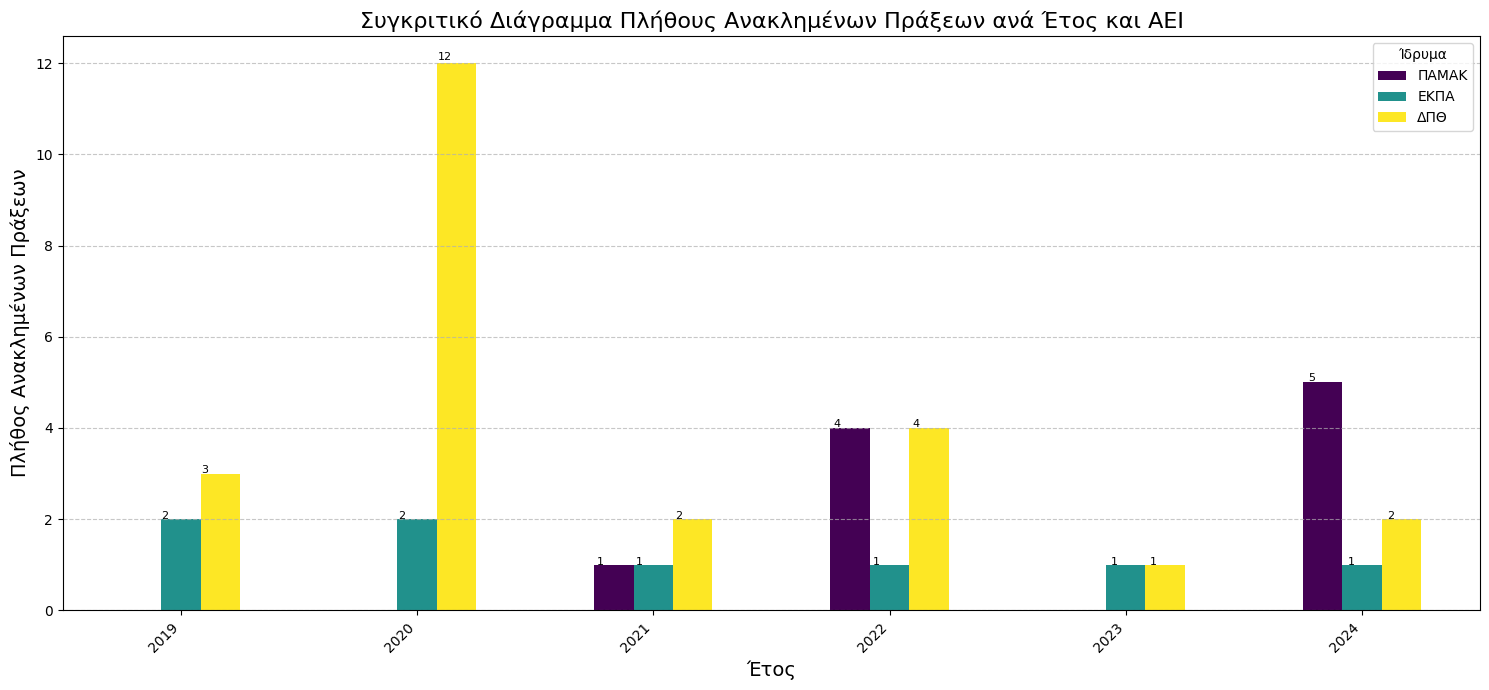

In [ ]:
# Ερώτημα 3

def get_yearly_revoked_counts(uid, institution_name, years_range_param):
    yearly_results_revoked = {}
    print(f"🔍 Αναζήτηση ΑΝΑΚΛΗΜΕΝΩΝ πράξεων για {institution_name} (UID: {uid})...\n")

    for year_val in years_range_param:
        print(f"  🔄 Επεξεργασία έτους: {year_val} για ανακλημένες πράξεις ({institution_name})...")
        yearly_total_revoked_this_year = 0
        error_occurred_this_year = False

        date_periods = [
            (f"{year_val}-01-01", f"{year_val}-04-30"),
            (f"{year_val}-05-01", f"{year_val}-08-31"),
            (f"{year_val}-09-01", f"{year_val}-12-31")
        ]

        for period_idx, (from_date, to_date) in enumerate(date_periods):
            params = {
                "org": uid,
                "from_issue_date": from_date,
                "to_issue_date": to_date,
                "status": "revoked", # <--- ΚΡΙΣΙΜΗ ΠΑΡΑΜΕΤΡΟΣ για ανακλημένες πράξεις
                "size": 1
            }
            try:
                response = requests.get(base_url_search, params=params, timeout=60)
                response.raise_for_status()
                data = response.json()
                sub_total_revoked = data.get("info", {}).get("total", 0)
                yearly_total_revoked_this_year += sub_total_revoked
            except requests.exceptions.HTTPError as http_err:
                print(f"    ⚠️  Σφάλμα HTTP (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name} (ανακλημένες). Σφάλμα: {http_err}")
                error_occurred_this_year = True
                break
            except requests.exceptions.RequestException as req_err:
                print(f"    ⚠️  Σφάλμα αιτήματος (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name} (ανακλημένες). Σφάλμα: {req_err}")
                error_occurred_this_year = True
                break
            except ValueError as json_err:
                print(f"    ⚠️  Σφάλμα JSON (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name} (ανακλημένες). Σφάλμα: {json_err} (Απάντηση: {response.text[:100]})")
                error_occurred_this_year = True
                break
            except Exception as e:
                print(f"    ⚠️  Άγνωστο σφάλμα (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name} (ανακλημένες). Σφάλμα: {e}")
                error_occurred_this_year = True
                break
        
        if error_occurred_this_year:
            yearly_results_revoked[year_val] = "Σφάλμα"
            print(f"  ❌ Ολοκληρώθηκε με σφάλματα η επεξεργασία του έτους {year_val} για {institution_name} (ανακλημένες).\n")
        else:
            yearly_results_revoked[year_val] = yearly_total_revoked_this_year
            print(f"  ✅ Ολοκληρώθηκε η επεξεργασία του έτους {year_val} για {institution_name} (ανακλημένες). Σύνολο: {yearly_total_revoked_this_year}\n")
            
    return yearly_results_revoked

# --- Συλλογή δεδομένων για όλες τις ανακλημένες πράξεις ---
all_results_q3 = {}
for inst in institutions:
    all_results_q3[inst['short_name']] = get_yearly_revoked_counts(inst['uid'], inst['name'], years_range)

# --- Δημιουργία DataFrame για συγκριτική παρουσίαση ανακλημένων πράξεων ---
df_q3_revoked_counts = pd.DataFrame(all_results_q3)

print("\n" + "="*70)
print("📊 [Ερώτημα 3] Συγκριτικός Πίνακας Πλήθους ΑΝΑΚΛΗΜΕΝΩΝ Πράξεων ανά Έτος και Ίδρυμα")
print("="*70)
if not df_q3_revoked_counts.empty:
    for col in df_q3_revoked_counts.columns:
        df_q3_revoked_counts[col] = pd.to_numeric(df_q3_revoked_counts[col], errors='coerce')
    print(df_q3_revoked_counts.to_string())
else:
    print("Δεν υπάρχουν δεδομένα για εμφάνιση στον πίνακα.")
print("="*70 + "\n")

# --- Δημιουργία Συγκριτικού Ραβδογράμματος για Ανακλημένες Πράξεις ---
if not df_q3_revoked_counts.empty:
    df_plot_q3 = df_q3_revoked_counts.fillna(0) 

    if not df_plot_q3.empty:
        df_plot_q3.plot(kind='bar', figsize=(15, 7), colormap='viridis') # Διαφορετικό colormap για ποικιλία
        plt.title('Συγκριτικό Διάγραμμα Πλήθους Ανακλημένων Πράξεων ανά Έτος και ΑΕΙ', fontsize=16)
        plt.xlabel('Έτος', fontsize=14)
        plt.ylabel('Πλήθος Ανακλημένων Πράξεων', fontsize=14)
        plt.xticks(rotation=45, ha="right")
        plt.yticks(fontsize=10)
        plt.legend(title='Ίδρυμα')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        ax_q3_comp = plt.gca()
        ax_q3_comp.yaxis.set_major_locator(ticker.MaxNLocator(integer=True)) # Ακέραιες τιμές στον Υ
        
        # Προσθήκη τιμών πάνω από τις μπάρες (προαιρετικά, μπορεί να γίνει cluttered)
        for p in ax_q3_comp.patches:
             if p.get_height() > 0:
                 ax_q3_comp.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)
        
        # Προσθήκη τίτλου και υποτίτλου
        plt.tight_layout()
        graph_filename_q3_compare = "praxeis_anaklimenes_q3_συγκριτικό.png"
        plt.savefig(graph_filename_q3_compare)
        print(f"\n📈 Το συγκριτικό γράφημα ανακλημένων πράξεων (Ερώτημα 3) αποθηκεύτηκε ως '{graph_filename_q3_compare}'")
        plt.show()
    else:
        print("\n🚫 Δεν υπάρχουν επαρκή δεδομένα (χωρίς σφάλματα) για τη δημιουργία συγκριτικού γραφήματος ανακλημένων πράξεων (Ερώτημα 3).")
else:
    print("\n🚫 Δεν ήταν δυνατή η ανάκτηση δεδομένων για το Ερώτημα 3 για κανένα ίδρυμα.")

## Ερώτημα 4

### Πόσες από τις πράξεις που έχουν ανακληθεί περιέχουν προσωπικά δεδομένα;

In [ ]:
# Ερώτημα 4


def get_yearly_revoked_pd_counts(uid, institution_name, years_range_param):
    yearly_results_revoked_pd = {}
    print(f"🔍 Αναζήτηση ΑΝΑΚΛΗΜΕΝΩΝ πράξεων ΜΕ ΠΡΟΣΩΠΙΚΑ ΔΕΔΟΜΕΝΑ για {institution_name} (UID: {uid})...\n")

    for year_val in years_range_param:
        print(f"  🔄 Επεξεργασία έτους: {year_val} για ανακλημένες πράξεις με προσωπικά δεδομένα ({institution_name})...")
        yearly_total_revoked_pd_this_year = 0
        error_occurred_this_year = False

        date_periods = [
            (f"{year_val}-01-01", f"{year_val}-04-30"),
            (f"{year_val}-05-01", f"{year_val}-08-31"),
            (f"{year_val}-09-01", f"{year_val}-12-31")
        ]

        for period_idx, (from_date, to_date) in enumerate(date_periods):
            params = {
                "org": uid,
                "from_issue_date": from_date,
                "to_issue_date": to_date,
                "status": "revoked",
                "privateData": "true", # <--- ΕΠΙΠΛΕΟΝ ΠΑΡΑΜΕΤΡΟΣ
                "size": 1
            }
            try:
                response = requests.get(base_url_search, params=params, timeout=60)
                response.raise_for_status()
                data = response.json()
                sub_total_revoked_pd = data.get("info", {}).get("total", 0)
                yearly_total_revoked_pd_this_year += sub_total_revoked_pd
            except requests.exceptions.HTTPError as http_err:
                print(f"    ⚠️  Σφάλμα HTTP (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name} (ανακλ. με προσ. δεδομένα). Σφάλμα: {http_err}")
                error_occurred_this_year = True
                break
            # ... (ίδιος χειρισμός σφαλμάτων με τα προηγούμενα ερωτήματα) ...
            except requests.exceptions.RequestException as req_err:
                print(f"    ⚠️  Σφάλμα αιτήματος (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name} (ανακλ. με προσ. δεδομένα). Σφάλμα: {req_err}")
                error_occurred_this_year = True
                break
            except ValueError as json_err:
                print(f"    ⚠️  Σφάλμα JSON (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name} (ανακλ. με προσ. δεδομένα). Σφάλμα: {json_err} (Απάντηση: {response.text[:100]})")
                error_occurred_this_year = True
                break
            except Exception as e:
                print(f"    ⚠️  Άγνωστο σφάλμα (Τετράμηνο {period_idx+1}, {year_val}) για {institution_name} (ανακλ. με προσ. δεδομένα). Σφάλμα: {e}")
                error_occurred_this_year = True
                break
        
        if error_occurred_this_year:
            yearly_results_revoked_pd[year_val] = "Σφάλμα"
            print(f"  ❌ Ολοκληρώθηκε με σφάλματα η επεξεργασία του έτους {year_val} για {institution_name} (ανακλ. με προσ. δεδομένα).\n")
        else:
            yearly_results_revoked_pd[year_val] = yearly_total_revoked_pd_this_year
            print(f"  ✅ Ολοκληρώθηκε η επεξεργασία του έτους {year_val} για {institution_name} (ανακλ. με προσ. δεδομένα). Σύνολο: {yearly_total_revoked_pd_this_year}\n")
            
    return yearly_results_revoked_pd

# --- Συλλογή δεδομένων για όλες τις ανακλημένες πράξεις με προσωπικά δεδομένα ---
all_results_q4 = {}
for inst in institutions:
    all_results_q4[inst['short_name']] = get_yearly_revoked_pd_counts(inst['uid'], inst['name'], years_range)

# --- Δημιουργία DataFrame για συγκριτική παρουσίαση ανακλημένων πράξεων με προσωπικά δεδομένα ---
df_q4_revoked_pd_counts = pd.DataFrame(all_results_q4)

print("\n" + "="*80)
print("📊 [Ερώτημα 4] Συγκριτικός Πίνακας Πλήθους ΑΝΑΚΛΗΜΕΝΩΝ Πράξεων ΜΕ ΠΡΟΣΩΠΙΚΑ ΔΕΔΟΜΕΝΑ")
print("="*80)
if not df_q4_revoked_pd_counts.empty:
    for col in df_q4_revoked_pd_counts.columns:
        df_q4_revoked_pd_counts[col] = pd.to_numeric(df_q4_revoked_pd_counts[col], errors='coerce')
    print(df_q4_revoked_pd_counts.to_string())
else:
    print("Δεν υπάρχουν δεδομένα για εμφάνιση στον πίνακα.")
print("="*80 + "\n")

# --- Δημιουργία Συγκριτικού Ραβδογράμματος για Ανακλημένες Πράξεις με Προσωπικά Δεδομένα ---
if not df_q4_revoked_pd_counts.empty:
    df_plot_q4 = df_q4_revoked_pd_counts.fillna(0)

    if not df_plot_q4.empty:
        df_plot_q4.plot(kind='bar', figsize=(15, 8), colormap='Set2') # Διαφορετικό colormap
        plt.title('Συγκριτικό Διάγραμμα: Ανακλημένες Πράξεις με Προσωπικά Δεδομένα ανά Έτος & ΑΕΙ', fontsize=14)
        plt.xlabel('Έτος', fontsize=12)
        plt.ylabel('Πλήθος Ανακλημένων Πράξεων με Προσωπικά Δεδομένα', fontsize=10)
        plt.xticks(rotation=45, ha="right")
        plt.yticks(fontsize=10)
        plt.legend(title='Ίδρυμα')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        ax_q4_comp = plt.gca()
        ax_q4_comp.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

        # Προσθήκη τιμών πάνω από τις μπάρες (προαιρετικά, μπορεί να γίνει cluttered)
        for p in ax_q4_comp.patches:
             if p.get_height() > 0:
                 ax_q4_comp.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)

        # Προσθήκη τίτλου και υποτίτλου
        plt.tight_layout()
        graph_filename_q4_compare = "praxeis_anaklimenes_pd_q4_συγκριτικό.png"
        plt.savefig(graph_filename_q4_compare)
        print(f"\n📈 Το συγκριτικό γράφημα (Ερώτημα 4) αποθηκεύτηκε ως '{graph_filename_q4_compare}'")
        plt.show()
    else:
        print("\n🚫 Δεν υπάρχουν επαρκή δεδομένα για τη δημιουργία συγκριτικού γραφήματος (Ερώτημα 4).")
else:
    print("\n🚫 Δεν ήταν δυνατή η ανάκτηση δεδομένων για το Ερώτημα 4 για κανένα ίδρυμα.")

🔍 Αναζήτηση ΑΝΑΚΛΗΜΕΝΩΝ πράξεων ΜΕ ΠΡΟΣΩΠΙΚΑ ΔΕΔΟΜΕΝΑ για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (UID: 99206919)...

  🔄 Επεξεργασία έτους: 2019 για ανακλημένες πράξεις με προσωπικά δεδομένα (ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ)...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2019 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (ανακλ. με προσ. δεδομένα). Σύνολο: 0

  🔄 Επεξεργασία έτους: 2020 για ανακλημένες πράξεις με προσωπικά δεδομένα (ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ)...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2020 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (ανακλ. με προσ. δεδομένα). Σύνολο: 0

  🔄 Επεξεργασία έτους: 2021 για ανακλημένες πράξεις με προσωπικά δεδομένα (ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ)...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2021 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (ανακλ. με προσ. δεδομένα). Σύνολο: 1

  🔄 Επεξεργασία έτους: 2022 για ανακλημένες πράξεις με προσωπικά δεδομένα (ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ)...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2022 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (ανακλ. με προσ. δεδομένα). Σύνολο: 4

  🔄 Επεξεργασία έτους: 2023 για αν

## Ερώτημα 5

### Οργανωτικές μονάδες του ΔΠΘ.


🏢 [Ερώτημα 5] Ενεργές Οργανωτικές Μονάδες ανά ΑΕΙ
🔍 [Ερώτημα 5] Ανάκτηση ενεργών οργανωτικών μονάδων για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (UID: 99206919)...

✅ Συνολικά ενεργές οργανωτικές μονάδες που ανακτήθηκαν (και επιβεβαιώθηκαν ως active): 64 για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ


--- Ενεργές Οργανωτικές Μονάδες για το ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ ---
Συνολικό Πλήθος Ενεργών Μονάδων: 64
--------------------------------------------------
1. Ονομασία: ΑΝΤΙΠΡΥΤΑΝΗΣ ΑΚΑΔΗΜΑΙΚΩΝ, ΔΙΟΙΚΗΤΙΚΩΝ ΥΠΟΘΕΣΕΩΝ ΚΑΙ ΠΡΟΣΩΠΙΚΟΥ (UID: 100095134)
   Κατηγορία: ORG_UNIT_OTHER
2. Ονομασία: ΑΝΤΙΠΡΥΤΑΝΗΣ ΟΙΚΟΝΟΜΙΚΩΝ ΥΠΟΘΕΣΕΩΝ ΚΑΙ ΥΠΟΔΟΜΩΝ (UID: 100081653)
   Κατηγορία: ORG_UNIT_OTHER
3. Ονομασία: ΑΝΤΙΠΡΥΤΑΝΗΣ ΟΙΚΟΝΟΜΙΚΩΝ ΥΠΟΘΕΣΕΩΝ ΚΑΙ ΥΠΟΔΟΜΩΝ (UID: 100094234)
   Κατηγορία: ORG_UNIT_OTHER
4. Ονομασία: ΑΝΤΙΠΡΥΤΑΝΗΣ ΦΟΙΤΗΤΙΚΗΣ ΜΕΡΙΜΝΑΣ ΚΑΙ ΔΙΑ ΒΙΟΥ ΜΑΘΗΣΗΣ (UID: 100081655)
   Κατηγορία: ORG_UNIT_OTHER
5. Ονομασία: ΓΡΑΦΕΙΟ ΔΙΑΣΥΝΔΕΣΗΣ (UID: 86041)
   Κατηγορία: OFFICE
6. Ονομασία: Δ.Π.Μ.Σ. ΑΝΘΡΩΠΙΝΑ ΔΙΚΑΙΩΜΑΤΑ ΚΑΙ ΜΕΤΑΝΑΣΤΕΥΤΙΚ

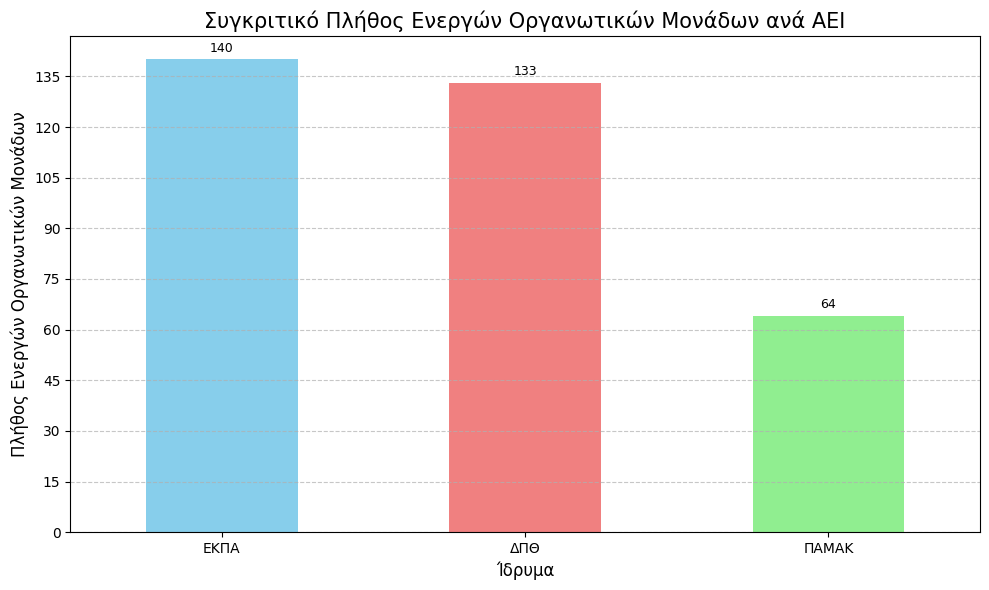

In [8]:
# Ερώτημα 5

def get_active_organizational_units(uid, institution_full_name):
    units_url = f"https://diavgeia.gov.gr/opendata/organizations/{uid}/units.json"
    active_units_list = []
    active_units_count = 0
    
    print(f"🔍 [Ερώτημα 5] Ανάκτηση ενεργών οργανωτικών μονάδων για {institution_full_name} (UID: {uid})...\n")
    
    params = {"status": "active"}
    
    try:
        response = requests.get(units_url, params=params, timeout=30)
        response.raise_for_status()
        data = response.json()
        units_data = data.get("units", [])

        if not units_data:
            print(f"ℹ️ Δεν βρέθηκαν ενεργές οργανωτικές μονάδες (status=active) για τον φορέα {institution_full_name} (βάσει API response).\n")
        else:
            for unit in units_data:
                # Το API θα έπρεπε να επιστρέφει μόνο ενεργές, αλλά κάνουμε έναν επιπλέον έλεγχο για το πεδίο "active": true
                if unit.get("active") is True: 
                    active_units_list.append({
                        "uid": unit.get("uid", "N/A"),
                        "label": unit.get("label", "N/A"),
                        "category": unit.get("category", "N/A")
                    })
            active_units_count = len(active_units_list) # Το πλήθος των μονάδων που όντως έχουν active: true
            
            print(f"✅ Συνολικά ενεργές οργανωτικές μονάδες που ανακτήθηκαν (και επιβεβαιώθηκαν ως active): {active_units_count} για {institution_full_name}\n")

    except requests.exceptions.HTTPError as http_err:
        print(f"❌ HTTP σφάλμα κατά την ανάκτηση οργανωτικών μονάδων για {institution_full_name}: {http_err}\n")
    except requests.exceptions.RequestException as req_err:
        print(f"❌ Σφάλμα αιτήματος κατά την ανάκτηση οργανωτικών μονάδων για {institution_full_name}: {req_err}\n")
    except ValueError as json_err: # Ή json.JSONDecodeError
        print(f"⚠️ Σφάλμα JSON κατά την ανάκτηση οργανωτικών μονάδων για {institution_full_name}: {json_err} (Απάντηση: {response.text[:200]})\n")
    except Exception as e:
        print(f"⚠️ Άγνωστο σφάλμα κατά την ανάκτηση οργανωτικών μονάδων για {institution_full_name}: {e}\n")
        
    return active_units_count, active_units_list

# --- Συλλογή και εμφάνιση δεδομένων για όλες τις οργανωτικές μονάδες ---
print("\n" + "="*80)
print("🏢 [Ερώτημα 5] Ενεργές Οργανωτικές Μονάδες ανά ΑΕΙ")
print("="*80)

# Για αποθήκευση των αριθμών μονάδων για πιθανό συγκριτικό γράφημα
institutional_unit_counts = {}

for inst in institutions:
    count, units = get_active_organizational_units(inst['uid'], inst['name'])
    institutional_unit_counts[inst['short_name']] = count
    
    print(f"\n--- Ενεργές Οργανωτικές Μονάδες για το {inst['name']} ---")
    print(f"Συνολικό Πλήθος Ενεργών Μονάδων: {count}")
    print("-" * 50)
    if units:
        for i, unit in enumerate(units, 1):
            print(f"{i}. Ονομασία: {unit['label']} (UID: {unit['uid']})")
            if unit['category'] != "N/A": # Εμφάνιση κατηγορίας μόνο αν υπάρχει
                 print(f"   Κατηγορία: {unit['category']}")
    else:
        if count == 0: # Για την περίπτωση που η συνάρτηση επέστρεψε 0 λόγω έλλειψης δεδομένων (όχι σφάλματος)
             print("Δεν βρέθηκαν ενεργές οργανωτικές μονάδες για αυτό το ΑΕΙ στη Δι@ύγεια.")
    print("-" * 50 + "\n")

# --- (Προαιρετικό) Συγκριτικό Ραβδόγραμμα για το Πλήθος των Μονάδων ---
if institutional_unit_counts:
    df_unit_counts = pd.Series(institutional_unit_counts).sort_values(ascending=False)
    
    if not df_unit_counts.empty:
        plt.figure(figsize=(10, 6))
        bars = df_unit_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
        plt.title('Συγκριτικό Πλήθος Ενεργών Οργανωτικών Μονάδων ανά ΑΕΙ', fontsize=15)
        plt.xlabel('Ίδρυμα', fontsize=12)
        plt.ylabel('Πλήθος Ενεργών Οργανωτικών Μονάδων', fontsize=12)
        plt.xticks(rotation=0) # Οριζόντια τα ονόματα των ΑΕΙ αν είναι λίγα
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        ax_q5_comp = plt.gca()
        ax_q5_comp.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

        # Προσθήκη τιμών πάνω από τις μπάρες
        for i, v in enumerate(df_unit_counts):
            if v > 0 : # Εμφάνιση μόνο αν η τιμή είναι > 0
                plt.text(i, v + df_unit_counts.max()*0.01 , str(int(v)), color='black', ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        graph_filename_q5_compare = "organizational_units_q5_συγκριτικό.png"
        plt.savefig(graph_filename_q5_compare)
        print(f"\n📈 Το συγκριτικό γράφημα πλήθους οργανωτικών μονάδων (Ερώτημα 5) αποθηκεύτηκε ως '{graph_filename_q5_compare}'")
        plt.show()
    else:
        print("\n🚫 Δεν υπάρχουν δεδομένα για τη δημιουργία συγκριτικού γραφήματος πλήθους οργανωτικών μονάδων (Ερώτημα 5).")